In [26]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

from sklearn.model_selection import train_test_split
import mglearn

Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.0.3
matplotlib version: 3.7.2
NumPy version: 1.23.5
SciPy version: 1.10.1
IPython version: 8.20.0
scikit-learn version: 1.2.2


# Gradient boosted regression trees (gradient boosting machines)

### Gradient Boosted Regression Trees (GBRT) – Simplified Explanation:

Gradient Boosted Regression Trees (GBRT) is a machine learning technique used for both **regression** and **classification** tasks. Here’s how it works in simpler terms:

1. **Ensemble Learning**: GBRT is an ensemble method, which means it combines multiple models (called **decision trees**) to create a stronger model. Each individual tree is weak on its own, but when combined, they make powerful predictions.

2. **Serial Training**: Unlike Random Forests, which build trees independently and randomly, GBRT builds each tree one at a time in a **series**. Each new tree focuses on correcting the mistakes of the previous trees.

3. **Weak Learners**: GBRT uses **shallow trees**, meaning trees with a limited depth (usually 1 to 5 layers). These trees are simple and are known as "weak learners" because each one can only handle part of the data well.

4. **Improvement Step-by-Step**: The idea is to build one weak tree at a time and gradually **improve** the model's performance. Each tree tries to "fix" where the previous tree was wrong. Over time, as more trees are added, the model becomes more accurate.

5. **Memory Efficient and Fast**: Because GBRT trees are shallow, the model is smaller and faster at making predictions compared to deeper decision trees.

6. **Learning Rate**: GBRT uses a **learning rate** to control how strongly each new tree corrects the previous tree's mistakes. A **higher learning rate** means stronger corrections but may lead to overfitting (the model becomes too complex). A **lower learning rate** means smaller steps toward improving the model, but more trees are needed.

7. **Tuning Parameters**:
   - **n_estimators**: The number of trees in the model. More trees generally make the model better, but also more complex.
   - **max_depth**: How deep each tree is allowed to be. Shallow trees (low depth) are used to keep the model simple.
   - **learning_rate**: Controls how much each tree impacts the final model. A lower learning rate means more trees are needed but helps avoid overfitting.

### Why GBRT Is Popular:
- **Accuracy**: When tuned properly, GBRT can be **more accurate** than other models like Random Forests.
- **Common in Competitions**: GBRT is often the go-to model in machine learning competitions and is widely used in industry.

### Example:
Here’s a typical usage of `GradientBoostingClassifier` (GBRT for classification) on the **Breast Cancer dataset**:
- The model builds **100 trees**, each with a **maximum depth of 3**.
- It uses a **learning rate of 0.1** to gradually improve the accuracy of predictions. 

GBRT can outperform other models if the parameters (like the number of trees and learning rate) are set correctly, making it a powerful tool in machine learning.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [28]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [29]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.958


Both methods of decreasing the model complexity reduced the training set accuracy,
as expected. In this case, lowering the maximum depth of the trees provided a signifi‐
cant improvement of the model, while lowering the learning rate only increased the
generalization performance slightly.
As for the other decision tree–based models, we can again visualize the feature
importances to get more insight into our model (Figure 2-35). As we used 100 trees, it
is impractical to inspect them all, even if they are all of depth 1:

ValueError: The number of FixedLocator locations (30), usually from a call to set_ticks, does not match the number of labels (4).

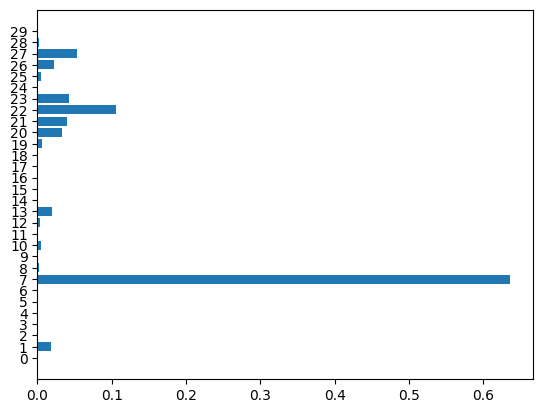

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot feature importances
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]  # Number of features in the dataset
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)  # Replace 'feature_names' with your actual feature names
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

# Assuming feature_names is defined (if not, replace it with your actual feature names)
# For example:
# feature_names = X_train.columns if it's a pandas DataFrame, or manually define the names if X_train is a NumPy array.

# Example feature names (if X_train is a NumPy array)
feature_names = ['feature1', 'feature2', 'feature3', 'feature4']  # Replace with actual names

# Call the function to plot feature importances
plot_feature_importances_cancer(gbrt)


### Strengths, Weaknesses, and Parameters of Gradient Boosted Decision Trees (GBDT) – Simplified:

**Strengths**:
1. **Powerful and Accurate**: Gradient boosted decision trees (GBDT) are **among the most powerful** models for supervised learning tasks like classification and regression. They often outperform other algorithms.
2. **Good with Mixed Features**: They work well with both **binary** and **continuous** features (numbers and yes/no values), without the need for scaling (no need to standardize data).
3. **No Scaling Required**: You don't need to normalize or scale your data like with other models (e.g., linear models).
  
**Weaknesses**:
1. **Sensitive to Parameter Tuning**: GBDT models require careful **tuning of parameters** like the number of trees and learning rate. Poor choices can lead to suboptimal performance or overfitting.
2. **Slow Training Time**: GBDT can take **longer to train** than some other algorithms, especially when the dataset is large.
3. **Doesn’t Perform Well on High-Dimensional Sparse Data**: If your data has many features (high-dimensional) and a lot of zeros (sparse), GBDT may not perform as well. Models like linear classifiers tend to be better for that type of data.

### Key Parameters to Tune:
1. **n_estimators**: 
   - This is the **number of trees** in the model.
   - A **larger number of trees** increases model complexity and accuracy, but can lead to **overfitting** (where the model is too specific to the training data).
   - More trees also increase training time.
   
2. **learning_rate**:
   - This controls how much each tree contributes to improving the overall model. It **adjusts the strength** of each new tree.
   - **Lower learning_rate** values (e.g., 0.01) mean you need **more trees** (higher `n_estimators`), but can lead to a more robust model that is less prone to overfitting.
   - **Higher learning_rate** values (e.g., 0.1 or higher) speed up learning but may lead to overfitting with fewer trees.

3. **max_depth** (or **max_leaf_nodes**):
   - These parameters control the **complexity of each tree**.
   - Usually, GBDT trees are kept **shallow** (low max_depth), often **not deeper than 5 splits**. This keeps the model simple, prevents overfitting, and reduces training time.

### Important Relationships:
- **n_estimators** and **learning_rate** are connected. A **smaller learning_rate** requires **more trees** (higher `n_estimators`) to reach the same accuracy as a larger learning rate with fewer trees.
- **max_depth** controls how complex each individual tree is. Usually, GBDT uses **shallow trees** to avoid overfitting and reduce computation.

### Best Practices:
- **Balance `n_estimators` and `learning_rate`**: Start with a lower `learning_rate` (like 0.01 or 0.1) and increase `n_estimators` until the model performs well without overfitting.
- **Set a low `max_depth`**: Shallow trees (depth between 1 and 5) are common in GBDT to keep the model general and fast.
- **Watch for overfitting**: A large number of trees can lead to overfitting if the learning rate and tree depth are not set carefully. You may need to use validation data to tune these parameters.

GBDT is a highly effective algorithm when tuned correctly, making it a popular choice in competitions and industry applications.